In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('../csv/All_Demand.csv', index_col=0)
df = df.drop(['Unnamed: 0.1'], axis=1)
df['Record Date'] = pd.to_datetime(df['Record Date'])
df = df.drop(index=1825)
df = df.sort_values('Record Date')
df = df.set_index("Record Date")
df1 = df[['Total Demand']].copy()
df1 =  df1.interpolate()
df1 = df1[1:]

In [ ]:
# df['WeekDay'] = df['Record Date'].dt.month

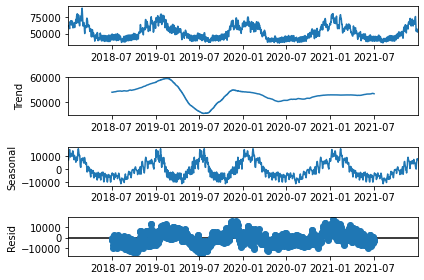

<Figure size 2160x504 with 0 Axes>

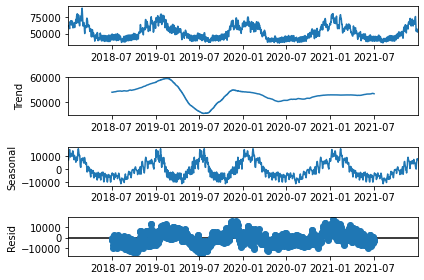

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

plt.figure(figsize=(30, 7))
result = seasonal_decompose(df1, model='additive', period=365)
result.plot()

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

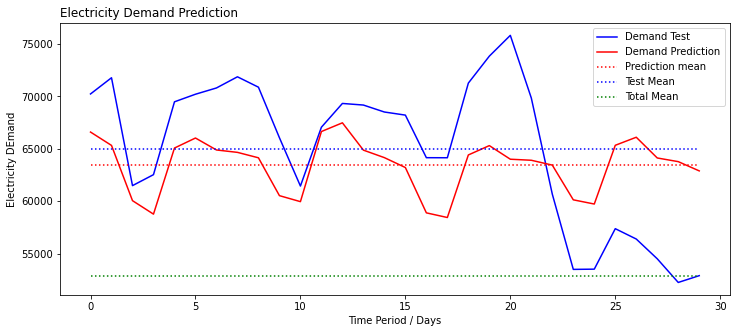

Mean: 52859.383
Mean Squared Error: 6499.069
Mean Absolute Error: 5839.716


In [170]:
X = df1.values
train, test = X[1:len(X)-30], X[len(X)-30:]
mean = []
mean2 = []
mean3 = []

# autoregression
model = AR(train)
model_fit = model.fit()

# predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# creating mean array to plot it
# Mean of the testing
for i in range(len(test)):
    mean.append(predictions.mean())
    mean2.append(test.mean())
    mean3.append(df1.values.mean())

plt.figure(figsize=(12, 5))
plt.title("Electricity Demand Prediction", loc = 'left')

plt.plot(test, color='blue', label='Demand Test')
plt.plot(predictions, color='red', label = 'Demand Prediction')

plt.plot(mean, color='red', label='Prediction mean', linestyle=':')
plt.plot(mean2, color='blue', label='Test Mean', linestyle=':')
plt.plot(mean3, color='green', label='Total Mean', linestyle=':')

plt.ylabel("Electricity DEmand")
plt.xlabel("Time Period / Days")

plt.legend()
plt.show()

print("Mean: %.3f" % df1.values.mean())

rmse = mean_squared_error(test, predictions, squared=False)
print('Mean Squared Error: %.3f' % rmse)

mae = mean_absolute_error(test, predictions)
print('Mean Absolute Error: %.3f' % mae)